# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Benjamin Robin

### Repo : https://github.com/BenjaminRobin22/Robin_M7_Final_Project

Hello! I hope this repo will provide you with a real life application showing data science in action through the sport of baseball. We will be analysing the article https://theanalyst.com/na/2021/04/how-the-analytics-movement-has-forever-changed-baseball/

In [16]:
## Importing items needed for 

from bs4 import BeautifulSoup
import requests
import spacy
from collections import Counter
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')

!pip list
print('Benjamin Robin pip install complete.')

Package                   Version
------------------------- ---------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.1
confection                0.1.4
contourpy                 1.2.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing      

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [17]:

from bs4 import BeautifulSoup

def fetch_article_content(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            # Find all <p> tags within the article section
            article_paragraphs = soup.find_all('p')
            # Combine paragraphs into a single string
            article_content = '\n'.join([paragraph.get_text() for paragraph in article_paragraphs])
            return article_content
        else:
            print("Failed to fetch the webpage. Status code:", response.status_code)
            return None
    except Exception as e:
        print("An error occurred:", str(e))
        return None

# URL of the article
article_url = "https://theanalyst.com/na/2021/04/how-the-analytics-movement-has-forever-changed-baseball/"

# Fetch the article content
article_content = fetch_article_content(article_url)

if article_content:
    # Print or process the fetched article content as needed
    print(article_content)
else:
    print("Failed to fetch article content.")

Some insist the analytics movement that spread across baseball in the early 2000s, inspiring a best-selling book and a hit movie, didn’t just change the game but ruined it.
Others stand by a belief that the influx of data and technology has only made Major League Baseball front offices, coaches, players and fans smarter.
The fact is: The practice of looking at statistics differently isn’t a 21st-century development. It’s believed to have started to an extent in the 1950s when some innovative people began to recognize that the traditional ways of evaluating player performance often did not tell the whole story.
Revolutionary executive Branch Rickey, who, of course, signed Jackie Robinson and created the minor league farm system, is also considered a pioneer in the use of statistical analysis for writing an article in Life magazine about an early version of on-base percentage.
Starting in the ’80s, fan and aspiring writer Bill James attempted to expand the thought process beyond the numb

In [18]:
def fetch_article_content(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            # Find all <p> tags within the article section
            article_paragraphs = soup.find_all('p')
            # Combine paragraphs into a single string
            article_content = '\n'.join([paragraph.get_text() for paragraph in article_paragraphs])
            return article_content
        else:
            print("Failed to fetch the webpage. Status code:", response.status_code)
            return None
    except Exception as e:
        print("An error occurred:", str(e))
        return None

def save_as_html(content, filename):
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(content)
        print("Article saved as", filename)
    except Exception as e:
        print("Failed to save the article:", str(e))

# URL of the article
article_url = "https://theanalyst.com/na/2021/04/how-the-analytics-movement-has-forever-changed-baseball/"

# Fetch the article content
article_content = fetch_article_content(article_url)

if article_content:
    # Save the article content as HTML
    save_as_html(article_content, "article.html")
else:
    print("Failed to fetch article content.")

Article saved as article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [19]:
with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML
soup = BeautifulSoup(html_content, "html.parser")

# Get text from HTML
article_text = soup.get_text()

# Perform sentiment analysis
sentiment = TextBlob(article_text).sentiment

# Print polarity score
print("Sentiment Polarity Score:", sentiment.polarity)

# Count number of sentences
sentences = article_text.split('.')
num_sentences = len(sentences)

print("Number of Sentences:", num_sentences)

Sentiment Polarity Score: 0.06556678034196016
Number of Sentences: 166


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [20]:
# Process the article text
doc = nlp(article_text)

# Tokenize the text and count frequencies
token_counter = Counter(token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.text.isspace())

# Get the 5 most frequent tokens
most_common_tokens = token_counter.most_common(5)

# Print the common tokens with numbers
print("Five Most Frequent Tokens:")
for i, (token, frequency) in enumerate(most_common_tokens, start=1):
    print(f"{i}. {token}")

# Sort tokens and their frequencies in descending order
sorted_tokens = sorted(token_counter.items(), key=lambda x: x[1], reverse=True)

# Print tokens and their frequencies with numbers in descending order
print("\nTokens and Their Frequencies (Descending Order):")
for i, (token, frequency) in enumerate(sorted_tokens, start=1):
    print(f"{i}. {token}: {frequency}")

Five Most Frequent Tokens:
1. baseball
2. data
3. game
4. league
5. hit

Tokens and Their Frequencies (Descending Order):
1. baseball: 25
2. data: 17
3. game: 15
4. league: 15
5. hit: 12
6. runs: 12
7. time: 12
8. analytics: 11
9. base: 11
10. technology: 10
11. players: 10
12. percentage: 10
13. ball: 10
14. tell: 9
15. mlb: 9
16. way: 9
17. plate: 9
18. stolen: 8
19. season: 8
20. hitting: 8
21. major: 7
22. considered: 7
23. think: 7
24. years: 7
25. record: 7
26. 2019: 7
27. began: 6
28. story: 6
29. james: 6
30. like: 6
31. number: 6
32. teams: 6
33. going: 6
34. bunting: 6
35. stealing: 6
36. ground: 6
37. high: 6
38. launch: 6
39. angle: 6
40. player: 5
41. average: 5
42. big: 5
43. stats: 5
44. team: 5
45. beane: 5
46. said: 5
47. past: 5
48. seasons: 5
49. home: 5
50. led: 5
51. bases: 5
52. low: 5
53. pitch: 5
54. framing: 5
55. pitches: 5
56. rate: 5
57. shift: 5
58. appearances: 5
59. 2020: 5
60. movement: 4
61. book: 4
62. ways: 4
63. analysis: 4
64. win: 4
65. winning: 4


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [21]:
# Extract lemmas and count frequencies
lemma_counter = Counter(token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.text.isspace())

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_counter.most_common(5)

# Print the common lemmas
print("5 Most Frequent Lemmas:")
for i, (lemma, frequency) in enumerate(most_common_lemmas, start=1):
    print(f"{i}. {lemma}")

# Print lemmas and their frequencies
print("\nLemmas and Their Frequencies:")
for i, (lemma, frequency) in enumerate(lemma_counter.items(), start=1):
    print(f"{i}. {lemma}: {frequency}")

5 Most Frequent Lemmas:
1. baseball
2. hit
3. game
4. league
5. steal

Lemmas and Their Frequencies:
1. insist: 1
2. analytic: 11
3. movement: 5
4. spread: 4
5. baseball: 25
6. early: 2
7. 2000s: 1
8. inspire: 2
9. well: 2
10. sell: 2
11. book: 6
12. hit: 20
13. movie: 2
14. change: 8
15. game: 19
16. ruin: 1
17. stand: 1
18. belief: 1
19. influx: 1
20. datum: 16
21. technology: 10
22. major: 10
23. league: 17
24. office: 1
25. coach: 3
26. player: 15
27. fan: 4
28. smarter: 1
29. fact: 1
30. practice: 2
31. look: 4
32. statistic: 2
33. differently: 1
34. 21st: 3
35. century: 2
36. development: 2
37. believe: 5
38. start: 5
39. extent: 1
40. 1950: 1
41. innovative: 1
42. people: 3
43. begin: 7
44. recognize: 1
45. traditional: 2
46. way: 13
47. evaluate: 2
48. performance: 1
49. tell: 15
50. story: 6
51. revolutionary: 2
52. executive: 2
53. branch: 1
54. rickey: 1
55. course: 2
56. sign: 2
57. jackie: 1
58. robinson: 1
59. create: 3
60. minor: 1
61. farm: 1
62. system: 3
63. consider:

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

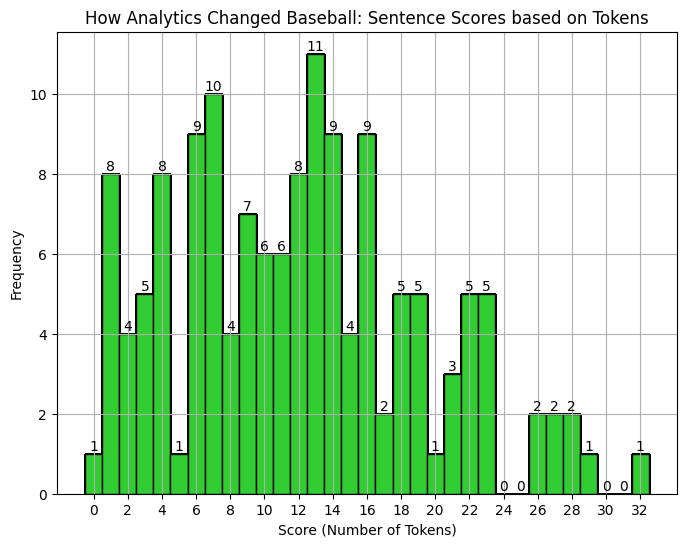

In [96]:
# Calculate scores for each sentence using tokens
sentence_scores_tokens = []
for sentence in doc.sents:
    tokens = [token.text.lower() for token in sentence if not token.is_stop and not token.is_punct and not token.text.isspace()]
    score = len(tokens)
    sentence_scores_tokens.append(score)

# Plot histogram for sentence scores using tokens with data labels
plt.figure(figsize=(8, 6))
plt.hist(sentence_scores_tokens, bins=range(min(sentence_scores_tokens), max(sentence_scores_tokens) + 2), align='left', color='limegreen', edgecolor='black')
plt.title('How Analytics Changed Baseball: Sentence Scores based on Tokens')
plt.xlabel('Score (Number of Tokens)')
plt.ylabel('Frequency')
plt.xticks(range(min(sentence_scores_tokens), max(sentence_scores_tokens) + 1, 2))

# Add data labels
for i, freq in enumerate(plt.hist(sentence_scores_tokens, bins=range(min(sentence_scores_tokens), max(sentence_scores_tokens) + 2), align='left', color='limegreen', edgecolor='black')[0]):
    plt.text(plt.hist(sentence_scores_tokens, bins=range(min(sentence_scores_tokens), max(sentence_scores_tokens) + 2), align='left', color='limegreen', edgecolor='black')[1][i], freq, str(int(freq)), color='black', fontsize=10, ha='center', va='bottom')

plt.grid(True)
plt.show()

###  From your histogram, what seems to be the most common range of scores 
#### Most of the sentences are 0 or neutral. To be exact 42% of the scores are 0 or neutral. Most scores fall between 1 and -1 or even more spefic .5 and -.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

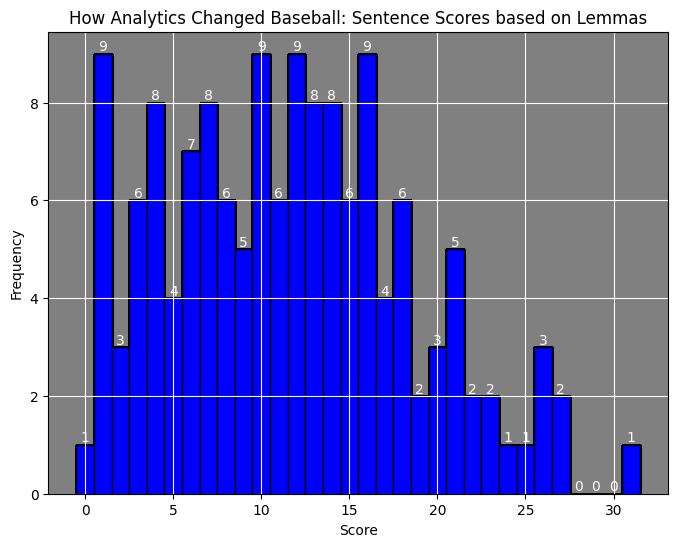

In [87]:
# Calculate scores for each sentence using lemmas
sentence_scores = []
for sentence in doc.sents:
    lemma_scores = [token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct and not token.text.isspace()]
    score = len(set(lemma_scores))
    sentence_scores.append(score)

# Plot histogram with customized appearance and data labels
plt.figure(figsize=(8, 6))
plt.hist(sentence_scores, bins=range(min(sentence_scores), max(sentence_scores) + 2), align='left', color='blue', edgecolor='grey')
plt.title('How Analytics Changed Baseball: Sentence Scores based on Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.gca().set_facecolor('grey')  # Set background color to black
plt.grid(True, color='white')  # Add grid lines with white color
for i, freq in enumerate(plt.hist(sentence_scores, bins=range(min(sentence_scores), max(sentence_scores) + 2), align='left', color='blue', edgecolor='grey')[0]):
    plt.text(plt.hist(sentence_scores, bins=range(min(sentence_scores), max(sentence_scores) + 2), align='left', color='blue', edgecolor='black')[1][i], freq, str(int(freq)), color='white', fontsize=10, ha='center', va='bottom')  # Add data labels
plt.show()

### From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
#### The most common score frequences range from the highest result of 1 and starts dropping off after 16. There are very few results greater than 25. 

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

I have 166 sentences which is quite alot to summarize. For this reason I will go with a higher cutoff. 

* Cutoff Score (tokens): 8
* Cutoff Score (lemmas):8 
  

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [60]:
# Given cutoff score for tokens
cutoff_score_tokens = 8

# Placeholder for the summary sentences
summary_sentences = []

# Calculate the total number of sentences in the article
total_sentences = sum(1 for _ in doc.sents)

# Initialize a counter for the number of sentences added to the summary
num_summary_sentences = 0

# Loop through the sentences and collect those with token counts above the cutoff
# Stop when approximately 10% of the sentences are added to the summary
for sent in doc.sents:
    token_count = len([token for token in sent if token.is_alpha])
    if token_count > cutoff_score_tokens:
        summary_sentences.append(sent.text.strip())
        num_summary_sentences += 1
        if num_summary_sentences >= total_sentences * 0.1:
            break  # Exit the loop if approximately 10% of the sentences are added to the summary

# Join the sentences to form the summary text
summary_text_tokens = '\n'.join(summary_sentences)

# Print the summary with a note about the percentage of the article covered
print("\033[1mSummary (approximately 10% of the article):\033[0m\n")
print(summary_text_tokens)

Summary (approximately 10% of the article):

Some insist the analytics movement that spread across baseball in the early 2000s, inspiring a best-selling book and a hit movie, didn’t just change the game but ruined it.
Others stand by a belief that the influx of data and technology has only made Major League Baseball front offices, coaches, players and fans smarter.
The fact is: The practice of looking at statistics differently isn’t a 21st-century development.
It’s believed to have started to an extent in the 1950s when some innovative people began to recognize that the traditional ways of evaluating player performance often did not tell the whole story.
Revolutionary executive Branch Rickey, who, of course, signed Jackie Robinson and created the minor league farm system, is also considered a pioneer in the use of statistical analysis for writing an article in Life magazine about an early version of on-base percentage.
Starting in the ’80s, fan and aspiring writer Bill James attempted 

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [71]:
# Create a TextBlob object for the summary text - by token
summary_tenpercent = TextBlob(summary_text_tokens)

# Calculate the polarity score of the summary
summary_polarity_score_token = summary_tenpercent.sentiment

# Print the polarity score of the summary above
print("\033[1mPolarity Score of the Tokens Summary:\033[0m", summary_polarity_score_token)

# Count the number of sentences in the summarized article
num_summary_sentences_token = len(summary_sentences)

# Print the the number of sentences of the summary above

print("\033[1mNumber of Sentences in the Tokens Summarized Article:\033[0m:", num_summary_sentences_token)

Polarity Score of the Tokens Summary: Sentiment(polarity=0.0759587332956898, subjectivity=0.4633493318275928)
Number of Sentences in the Tokens Summarized Article:: 15


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [59]:
# Given cutoff score for lemmas
cutoff_score_lemmas = 8

# Placeholder for the summary sentences
summary_sentences = []

# Calculate the total number of sentences in the article
total_sentences = sum(1 for _ in doc.sents)

# Initialize a counter for the number of sentences added to the summary
num_summary_sentences = 0

# Loop through the sentences and collect those with lemma counts above the cutoff
# Stop when approximately 10% of the sentences are added to the summary
for sent in doc.sents:
    lemma_count = len(set(token.lemma_ for token in sent if not token.is_stop and not token.is_punct and not token.text.isspace()))
    if lemma_count > cutoff_score_lemmas:
        summary_sentences.append(sent.text.strip())
        num_summary_sentences += 1
        if num_summary_sentences >= total_sentences * 0.1:
            break  # Exit the loop if approximately 10% of the sentences are added to the summary

# Join the sentences to form the summary text
summary_text_lemmas = '\n'.join(summary_sentences)

# Print the summary with a note about the percentage of the article covered
print("\033[1mSummary (approximately 10% of the article):\033[0m\n")
print(summary_text_lemmas)

Summary (approximately 10% of the article):

Some insist the analytics movement that spread across baseball in the early 2000s, inspiring a best-selling book and a hit movie, didn’t just change the game but ruined it.
Others stand by a belief that the influx of data and technology has only made Major League Baseball front offices, coaches, players and fans smarter.
It’s believed to have started to an extent in the 1950s when some innovative people began to recognize that the traditional ways of evaluating player performance often did not tell the whole story.
Revolutionary executive Branch Rickey, who, of course, signed Jackie Robinson and created the minor league farm system, is also considered a pioneer in the use of statistical analysis for writing an article in Life magazine about an early version of on-base percentage.
Starting in the ’80s, fan and aspiring writer Bill James attempted to expand the thought process beyond the numbers on the back of a baseball card and into what he 

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [72]:
# Create a TextBlob object for the summary text
summary_tenpercent = TextBlob(summary_text_lemmas)

# Calculate the polarity score of the summary
summary_polarity_score_lemmas = summary_tenpercent.sentiment

# Print the polarity score of the summary above
print("\033[1mPolarity Score of the Lemmas Summary:\033[0m", summary_polarity_score_lemmas)

# Count the number of sentences in the summarized article
num_summary_sentences_lemmas = len(summary_sentences)

# Print the the number of sentences of the summary above

print("\033[1mNumber of Sentences in the Lemmas Summarized Article:\033[0m:", num_summary_sentences_lemmas)

Polarity Score of the Lemmas Summary: Sentiment(polarity=0.08432142857142855, subjectivity=0.4648571428571428)
Number of Sentences in the Lemmas Summarized Article:: 15


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

|     Source      | # of Sentences | Polarity Score |  Notes
|-----------|----------------|----------------|--------------------|
| Full Article |  166  |   .0656             |  The full article is pretty close to neutral. It is slightly positive but is the least positive of the three views of the article.            |
| Token Score |      15 |       .0760         |  This summary has selectly removed negative words through simplifying the language possibly removing adjectives  or descriptive phrases that could have added context. |
| Lemma Score | 15 |   .0843  | The Lemmas score is the most positive because since the article is positive in nature the groups are positive on average thus creating more positivity.      |



13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

#### The full article was the best score because it was able to pull in all of the context and did not remove key phrases that helped define the sentiment of the article. 

